Group sizes:
Great Soundtrack: 96
No Soundtrack: 104

===== USER RATING TEST =====
T-statistic: 3.268765685247542
P-value: 0.0006412680013545619
Cohen's d: 0.45998219683378166

===== METACRITIC TEST =====
T-statistic: nan
P-value: nan
Cohen's d: 0.16198865076645413


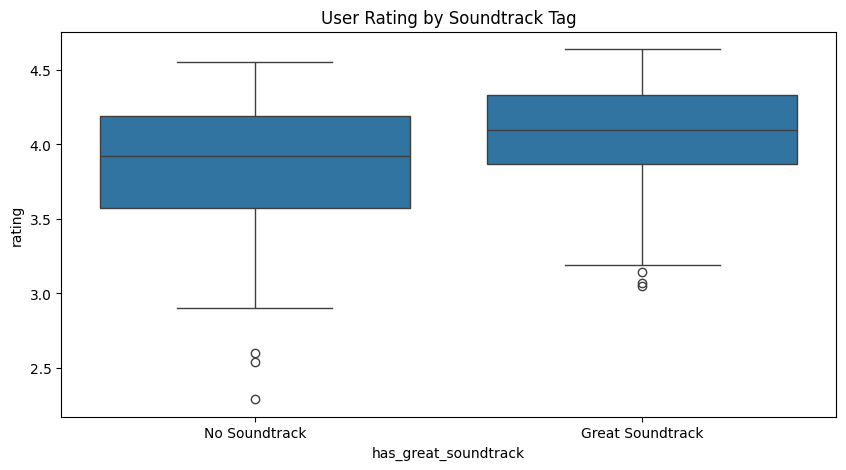

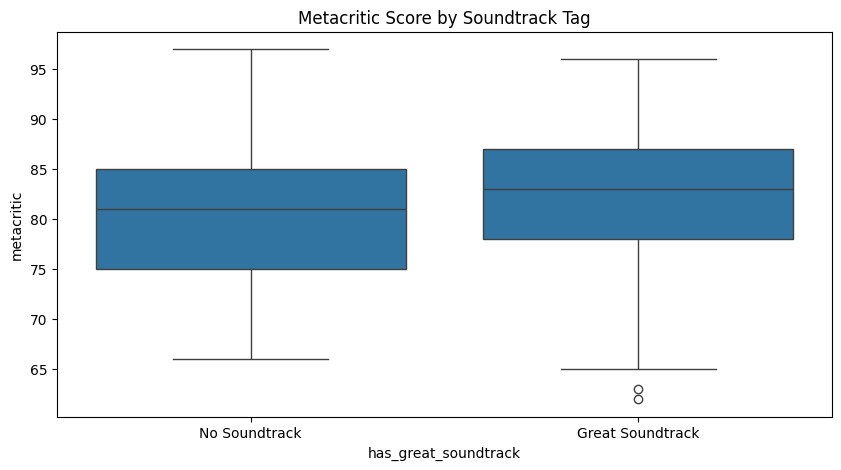

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

df = pd.read_csv("final_games_extended.csv")

soundtrack = df[df["has_great_soundtrack"] == 1]
no_soundtrack = df[df["has_great_soundtrack"] == 0]

print("Group sizes:")
print("Great Soundtrack:", len(soundtrack))
print("No Soundtrack:", len(no_soundtrack))

print("\n===== USER RATING TEST =====")

t_stat_rating, p_value_rating = stats.ttest_ind(
    soundtrack["rating"],
    no_soundtrack["rating"],
    equal_var=False,
    alternative="greater"
)

cohen_d_rating = (
    (soundtrack["rating"].mean() - no_soundtrack["rating"].mean()) /
    np.sqrt((soundtrack["rating"].std()**2 + no_soundtrack["rating"].std()**2) / 2)
)

print("T-statistic:", t_stat_rating)
print("P-value:", p_value_rating)
print("Cohen's d:", cohen_d_rating)

print("\n===== METACRITIC TEST =====")

t_stat_meta, p_value_meta = stats.ttest_ind(
    soundtrack["metacritic"],
    no_soundtrack["metacritic"],
    equal_var=False,
    alternative="greater"
)

cohen_d_meta = (
    (soundtrack["metacritic"].mean() - no_soundtrack["metacritic"].mean()) /
    np.sqrt((soundtrack["metacritic"].std()**2 + no_soundtrack["metacritic"].std()**2) / 2)
)

print("T-statistic:", t_stat_meta)
print("P-value:", p_value_meta)
print("Cohen's d:", cohen_d_meta)


plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="has_great_soundtrack", y="rating")
plt.xticks([0, 1], ["No Soundtrack", "Great Soundtrack"])
plt.title("User Rating by Soundtrack Tag")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="has_great_soundtrack", y="metacritic")
plt.xticks([0, 1], ["No Soundtrack", "Great Soundtrack"])
plt.title("Metacritic Score by Soundtrack Tag")
plt.show()
